In [1]:
import pandas as pd
import test_main

# Generating the data:
results = []
for seed in range(100000):
    try:
        results.append(test_main.test_random_battleships(seed, True))
    except:
        pass # Excludes the 4 failures
pd.DataFrame(data=results, columns=['num_attacks', 'board']).to_csv('results.csv', index=False)

In [142]:
# Reading and testing the data is what it shold be:
results = pd.read_csv('results.csv')
results.head()

,num_attacks,board
0,40,"[[None, None, None, None, None, None, None, No..."
1,44,"[[None, None, None, None, None, None, None, No..."
2,57,"[[None, None, None, None, None, None, 'Cruiser..."
3,33,"[[None, None, None, None, None, None, None, No..."
4,67,"[[None, None, None, None, None, None, None, No..."


<Axes: title={'center': 'Number of Attacks to Sink all Ships'}>

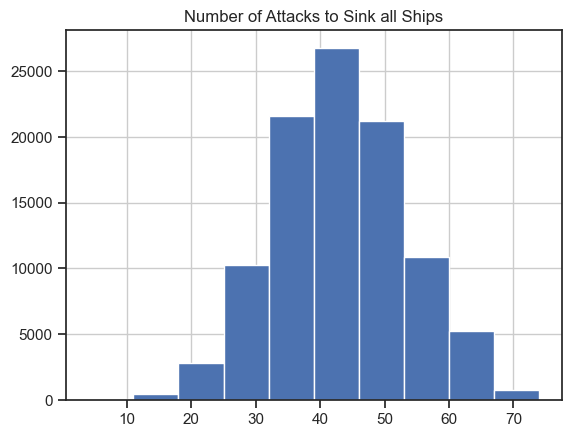

In [145]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme('notebook')
sns.set_style('ticks')
plt.title('Number of Attacks to Sink all Ships')
results['num_attacks'].hist()

In [130]:
median = results['num_attacks'].median()
std = results['num_attacks'].std()
print(f'Median: {median}\nStandard Deviation: {std.round(2)}')

Median: 42.0
Standard Deviation: 10.18


To create a better ship placing algorithm, I will pick a random board from the 100 most difficult boards tested (top 0.1%). This algorithm/function, 'set_board', can be found in main.py as a function in the 'Ai' class. I will save the most difficult boards to a file in the next cell:

In [143]:
difficult_boards = results.sort_values('num_attacks').tail(100)['board']
difficult_boards.to_csv('difficult-boards.csv', index=False)